# COVID Prediction with B-cell and SARS data

## Get Data

https://www.kaggle.com/futurecorporation/epitope-prediction

In [2]:
import pandas as pd

bcell = pd.read_csv("https://raw.githubusercontent.com/likarajo/covid19_prediction/main/input_bcell.csv")
bcell

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14382,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,177,191,QVHAEQGLIQYPTAW,0.910,0.175,1.054,0.820,4.894836,0.071719,-0.701083,46.875237,0
14383,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,285,299,SSLAKHGEYAPFARL,0.966,0.216,1.044,1.160,4.894836,0.071719,-0.701083,46.875237,0
14384,Q91DE1,MDRGTRRIWVSQNQGDTDLDYHKILTAGLTVQQGIVRQKIISVYLV...,189,203,TAWQSVGHMMVIFRL,0.821,0.023,1.044,-1.360,4.894836,0.071719,-0.701083,46.875237,0
14385,Q9QZS0,MHSKTAPRFLVFLLLTLLLLLAASPVASKGCVCKGKGQCLCAGTKG...,1479,1493,KRAHGQDLGTLGSCL,1.069,0.239,1.037,2.180,9.553040,0.044338,-0.671001,29.494308,0


In [3]:
sars = pd.read_csv("https://raw.githubusercontent.com/likarajo/covid19_prediction/main/input_sars.csv")
sars

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,17,MFIFLLFLTLTSGSDLD,0.887,0.040,1.056,-2.159,5.569763,0.116335,-0.061116,33.205116,0
1,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1,15,MFIFLLFLTLTSGSD,0.869,0.047,1.056,-2.500,5.569763,0.116335,-0.061116,33.205116,0
2,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,2,10,FIFLLFLTL,0.621,0.042,1.148,-7.467,5.569763,0.116335,-0.061116,33.205116,0
3,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,6,20,LFLTLTSGSDLDRCT,1.021,0.230,1.049,0.927,5.569763,0.116335,-0.061116,33.205116,0
4,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,9,25,TLTSGSDLDRCTTFDDV,1.089,0.627,1.015,3.165,5.569763,0.116335,-0.061116,33.205116,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1231,1245,SCGSCCKFDEDDSEP,1.227,0.503,1.035,4.907,5.569763,0.116335,-0.061116,33.205116,0
516,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1234,1255,SCCKFDEDDSEPVLKGVKLHYT,1.047,0.606,1.064,2.577,5.569763,0.116335,-0.061116,33.205116,0
517,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1255,CKFDEDDSEPVLKGVKLHYT,1.021,1.361,1.049,2.440,5.569763,0.116335,-0.061116,33.205116,1
518,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1250,CKFDEDDSEPVLKGV,1.051,0.886,1.042,3.127,5.569763,0.116335,-0.061116,33.205116,0


In [4]:
bs = pd.concat([bcell, sars], ignore_index=True)
bs

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target
0,A2T3T0,MDVLYSLSKTLKDARDKIVEGTLYSNVSDLIQQFNQMIITMNGNEF...,161,165,SASFT,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300,1
1,F0V2I4,MTIHKVAINGFGRIGRLLFRNLLSSQGVQVVAVNDVVDIKVLTHLL...,251,255,LCLKI,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512,1
2,O75508,MVATCLQVVGFVTSFVGWIGVIVTTSTNDWVVTCGYTIPTCRKLDE...,145,149,AHRET,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333,1
3,O84462,MTNSISGYQPTVTTSTSSTTSASGASGSLGASSVSTTANATVTQTA...,152,156,SNYDD,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373,1
4,P00918,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,85,89,DGTYR,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14902,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1231,1245,SCGSCCKFDEDDSEP,1.227,0.503,1.035,4.907,5.569763,0.116335,-0.061116,33.205116,0
14903,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1234,1255,SCCKFDEDDSEPVLKGVKLHYT,1.047,0.606,1.064,2.577,5.569763,0.116335,-0.061116,33.205116,0
14904,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1255,CKFDEDDSEPVLKGVKLHYT,1.021,1.361,1.049,2.440,5.569763,0.116335,-0.061116,33.205116,1
14905,AAU93319,MFIFLLFLTLTSGSDLDRCTTFDDVQAPNYTQHTSSMRGVYYPDEI...,1236,1250,CKFDEDDSEPVLKGV,1.051,0.886,1.042,3.127,5.569763,0.116335,-0.061116,33.205116,0


## Inspect the data
* Type of Features
* Null values
* Statistics

In [4]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14907 entries, 0 to 14906
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   parent_protein_id    14907 non-null  object 
 1   protein_seq          14907 non-null  object 
 2   start_position       14907 non-null  int64  
 3   end_position         14907 non-null  int64  
 4   peptide_seq          14907 non-null  object 
 5   chou_fasman          14907 non-null  float64
 6   emini                14907 non-null  float64
 7   kolaskar_tongaonkar  14907 non-null  float64
 8   parker               14907 non-null  float64
 9   isoelectric_point    14907 non-null  float64
 10  aromaticity          14907 non-null  float64
 11  hydrophobicity       14907 non-null  float64
 12  stability            14907 non-null  float64
 13  target               14907 non-null  int64  
dtypes: float64(8), int64(3), object(3)
memory usage: 1.6+ MB


In [5]:
categorical_features = bs.select_dtypes(include=['object']).columns.tolist()
print(len(categorical_features), categorical_features)
continuous_features = bs.select_dtypes(include=['int64', 'float64']).columns.tolist()
continuous_features.remove('target')
print(len(continuous_features), continuous_features)                                  

3 ['parent_protein_id', 'protein_seq', 'peptide_seq']
10 ['start_position', 'end_position', 'chou_fasman', 'emini', 'kolaskar_tongaonkar', 'parker', 'isoelectric_point', 'aromaticity', 'hydrophobicity', 'stability']


* 3 categorical features
* 10 continuous features
* No null values

## Data Preprocessing

* Find length of protein sequence
* Find length of peptide
* Find peptide region
* Drop unnecessary columns

In [5]:
bs['protein_seq_length'] = bs.apply(lambda x: len(x.protein_seq), axis=1)
bs['peptide_length'] = bs.apply(lambda x: len(x.peptide_seq), axis=1)
bs['peptide_region'] = bs.apply(lambda x: x.peptide_length/x.protein_seq_length, axis=1)

bs = bs.drop(columns=['parent_protein_id','protein_seq','peptide_seq','start_position','end_position'])
bs

,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,target,protein_seq_length,peptide_length,peptide_region
0,1.016,0.703,1.018,2.220,5.810364,0.103275,-0.143829,40.273300,1,397,5,0.012594
1,0.770,0.179,1.199,-3.860,6.210876,0.065476,-0.036905,24.998512,1,336,5,0.014881
2,0.852,3.427,0.960,4.280,8.223938,0.091787,0.879227,27.863333,1,207,5,0.024155
3,1.410,2.548,0.936,6.320,4.237976,0.044776,-0.521393,30.765373,1,1005,5,0.004975
4,1.214,1.908,0.937,4.640,6.867493,0.103846,-0.578846,21.684615,1,260,5,0.019231
...,...,...,...,...,...,...,...,...,...,...,...,...
14902,1.227,0.503,1.035,4.907,5.569763,0.116335,-0.061116,33.205116,0,1255,15,0.011952
14903,1.047,0.606,1.064,2.577,5.569763,0.116335,-0.061116,33.205116,0,1255,22,0.017530
14904,1.021,1.361,1.049,2.440,5.569763,0.116335,-0.061116,33.205116,1,1255,20,0.015936
14905,1.051,0.886,1.042,3.127,5.569763,0.116335,-0.061116,33.205116,0,1255,15,0.011952


In [7]:
bs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14907 entries, 0 to 14906
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   chou_fasman          14907 non-null  float64
 1   emini                14907 non-null  float64
 2   kolaskar_tongaonkar  14907 non-null  float64
 3   parker               14907 non-null  float64
 4   isoelectric_point    14907 non-null  float64
 5   aromaticity          14907 non-null  float64
 6   hydrophobicity       14907 non-null  float64
 7   stability            14907 non-null  float64
 8   target               14907 non-null  int64  
 9   protein_seq_length   14907 non-null  int64  
 10  peptide_length       14907 non-null  int64  
 11  peptide_region       14907 non-null  float64
dtypes: float64(9), int64(3)
memory usage: 1.4 MB


Only *continuous* features remain

## Build the model

### Experiment with different models
[PyCaret](https://pycaret.org/): To train and find best model



In [6]:
try:
  from pycaret.classification import *
except ModuleNotFoundError:
  !pip install pycaret
  from pycaret.classification import *

     |████████████████████████████████| 256kB 8.9MB/s 
     |████████████████████████████████| 14.2MB 228kB/s 
     |████████████████████████████████| 65.8MB 115kB/s 
     |████████████████████████████████| 245kB 56.2MB/s 
     |████████████████████████████████| 6.8MB 55.5MB/s 
     |████████████████████████████████| 174kB 60.7MB/s 
     |████████████████████████████████| 157.5MB 77kB/s 
     |████████████████████████████████| 102kB 15.2MB/s 
     |████████████████████████████████| 1.6MB 46.8MB/s 
     |████████████████████████████████| 276kB 48.6MB/s 
     |████████████████████████████████| 1.8MB 45.5MB/s 
     |████████████████████████████████| 153kB 57.5MB/s 
     |████████████████████████████████| 1.1MB 45.9MB/s 
     |████████████████████████████████| 81kB 12.2MB/s 
     |████████████████████████████████| 61kB 10.5MB/s 
     |████████████████████████████████| 348kB 52.8MB/s 
     |████████████████████████████████| 163kB 51.1MB/s 
     |████████████████████████████████| 81kB 12.1MB

### Split data to train and test sets

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
train, test = train_test_split(bs, test_size=0.2)

print(train.shape)
print(test.shape)

(11925, 12)
(2982, 12)


### Set up expertiment

In [9]:
experiment = setup(data=train, target='target', normalize=True)

,Description,Value
0,session_id,8454
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(11925, 12)"
5,Missing Values,False
6,Numeric Features,11
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### Train and compare multiple models

In [10]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8668,0.9185,0.7090,0.7794,0.7423,0.6527,0.6543,1.170
et,Extra Trees Classifier,0.8664,0.9163,0.7082,0.7783,0.7415,0.6517,0.6531,0.790
lightgbm,Light Gradient Boosting Machine,0.8603,0.9121,0.6599,0.7898,0.7187,0.6268,0.6315,0.188
catboost,CatBoost Classifier,0.8592,0.9130,0.6612,0.7858,0.7177,0.6249,0.6293,4.852
xgboost,Extreme Gradient Boosting,0.8553,0.9085,0.6554,0.7759,0.7101,0.6146,0.6189,4.476
gbc,Gradient Boosting Classifier,0.8187,0.8709,0.4787,0.7640,0.5879,0.4796,0.5015,0.981
dt,Decision Tree Classifier,0.8145,0.7590,0.6373,0.6642,0.6501,0.5240,0.5245,0.054
knn,K Neighbors Classifier,0.8016,0.8149,0.4730,0.6968,0.5632,0.4409,0.4549,0.139
ada,Ada Boost Classifier,0.7694,0.8093,0.3450,0.6410,0.4466,0.3173,0.3426,0.301
qda,Quadratic Discriminant Analysis,0.7328,0.6995,0.1492,0.5263,0.2309,0.1268,0.1645,0.022


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=8454, verbose=0,
                       warm_start=False)

### Test best models

5 models with high AUC


In [12]:
from sklearn.metrics import roc_auc_score

results = pd.DataFrame(columns=['Classifier', 'ModelType', 'AUC'])

In [13]:
best_models = ['rf', 'et', 'lightgbm', 'catboost', 'xgboost']

for m in best_models:
  print('MODEL: ', m)

  print('Creating model...')
  model = create_model(m)
  pred_model = predict_model(model, test)
  pred_model.dropna(inplace=True)
  try:
    results.loc[len(results)] = [m, 'Model', roc_auc_score(pred_model['target'], pred_model['Label'])]
  except:
    results.loc[len(results)] = [m, 'Model', 'NA']

  print('Tuning model...')
  model_tuned = tune_model(model)
  pred_model_tuned = predict_model(model_tuned, test)
  pred_model_tuned.dropna(inplace=True)
  try:
    results.loc[len(results)] = [m, 'Tuned Model', roc_auc_score(pred_model_tuned['target'], pred_model_tuned['Label'])]
  except:
    results.loc[len(results)] = [m, 'Tuned Model', 'NA']

  print('Ensembling model...')
  model_ensembled = ensemble_model(model)
  pred_model_ensembled = predict_model(model_ensembled, test)
  pred_model_ensembled.dropna(inplace=True)
  try:
    results.loc[len(results)] = [m, 'Ensembled Model', roc_auc_score(pred_model_ensembled['target'], pred_model_ensembled['Label'])]
  except:
    results.loc[len(results)] = [m, 'Ensembled Model', 'NA']

  print()

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8587,0.9160,0.6549,0.7872,0.7150,0.6221,0.6267
1,0.8719,0.9267,0.6637,0.8287,0.7371,0.6537,0.6608
2,0.8479,0.9112,0.6504,0.7538,0.6983,0.5974,0.6003
3,0.8527,0.9167,0.6416,0.7754,0.7022,0.6055,0.6103
4,0.8539,0.9046,0.6195,0.7955,0.6965,0.6023,0.6104
5,0.8611,0.9241,0.6504,0.7989,0.7171,0.6263,0.6321
6,0.8563,0.9034,0.6460,0.7849,0.7087,0.6145,0.6197
7,0.8513,0.8920,0.6533,0.7617,0.7033,0.6049,0.6081
8,0.8717,0.9239,0.6578,0.8315,0.7345,0.6514,0.6592
9,0.8489,0.8994,0.6283,0.7717,0.6927,0.5939,0.5994


### Check model with Best AUC

In [14]:
print(results.sort_values(by=['AUC'], ascending=False))

   Classifier        ModelType       AUC
1          rf      Tuned Model  0.818432
3          et            Model  0.807385
5          et  Ensembled Model  0.805760
0          rf            Model  0.803890
2          rf  Ensembled Model  0.800756
13    xgboost      Tuned Model  0.791486
9    catboost            Model  0.788519
6    lightgbm            Model  0.784849
12    xgboost            Model  0.784168
7    lightgbm      Tuned Model  0.782892
8    lightgbm  Ensembled Model  0.779359
11   catboost  Ensembled Model  0.778979
14    xgboost  Ensembled Model  0.777558
10   catboost      Tuned Model  0.774336
4          et      Tuned Model  0.557464


### Create the best model

Tuned *Random Forest*

In [15]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8659,0.9173,0.7257,0.7664,0.7455,0.6545,0.6549
1,0.8754,0.9306,0.7080,0.8081,0.7547,0.6717,0.6744
2,0.8551,0.9215,0.6726,0.7638,0.7153,0.6186,0.6209
3,0.8719,0.9323,0.7389,0.7767,0.7574,0.6704,0.6708
4,0.8695,0.9094,0.7301,0.7746,0.7517,0.6633,0.6638
5,0.8790,0.9295,0.7345,0.8019,0.7667,0.6853,0.6865
6,0.8599,0.9148,0.6858,0.7711,0.7260,0.6323,0.6343
7,0.8441,0.8878,0.6933,0.7189,0.7059,0.5999,0.6001
8,0.8777,0.9323,0.7022,0.8187,0.7560,0.6750,0.6786
9,0.8693,0.9095,0.6991,0.7940,0.7435,0.6563,0.6587


In [16]:
rf_tuned = tune_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8132,0.9033,0.8009,0.6199,0.6988,0.5666,0.5764
1,0.8419,0.9125,0.8761,0.6556,0.7500,0.6379,0.6522
2,0.8144,0.8918,0.8584,0.6120,0.7145,0.5827,0.6010
3,0.8144,0.9037,0.8319,0.6164,0.7081,0.5764,0.5903
4,0.8168,0.8836,0.8628,0.6151,0.7182,0.5880,0.6065
5,0.8383,0.9090,0.8628,0.6522,0.7429,0.6282,0.6413
6,0.8156,0.8870,0.8142,0.6216,0.7050,0.5743,0.5854
7,0.8046,0.8779,0.8356,0.5987,0.6976,0.5590,0.5759
8,0.8297,0.9133,0.8311,0.6426,0.7248,0.6044,0.6149
9,0.8177,0.8986,0.8363,0.6217,0.7132,0.5838,0.5976


## Evaluate the model

### ROC AUC

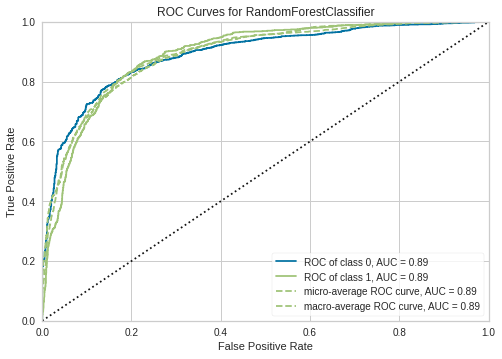

In [17]:
plot_model(rf_tuned)

### Confusion Matrix

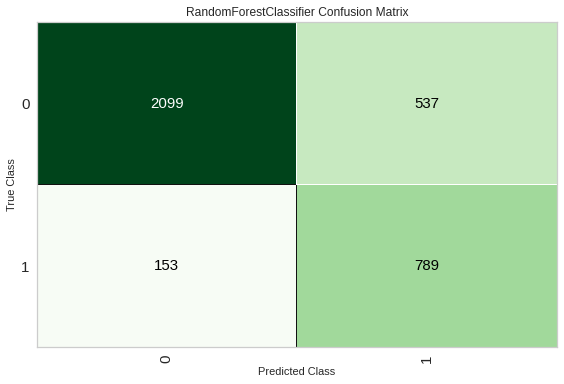

In [18]:
plot_model(rf_tuned, 'confusion_matrix')

### Discrimination threshold

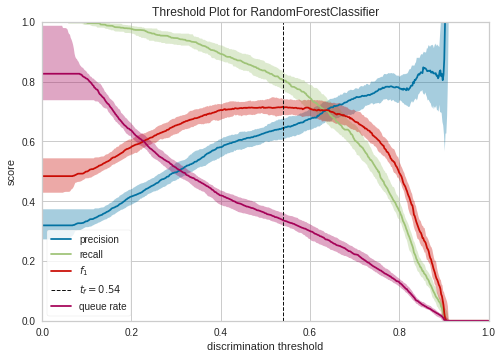

In [19]:
plot_model(rf_tuned, 'threshold')

### Class prediction error

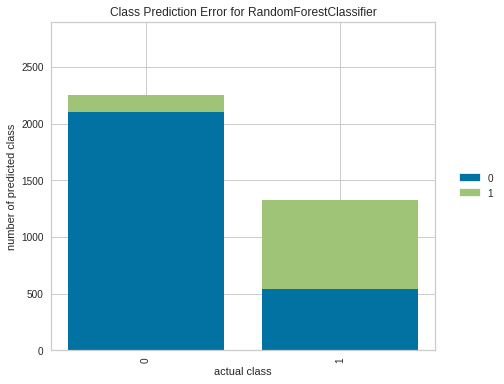

In [20]:
plot_model(rf_tuned, 'error')

### Classification Report

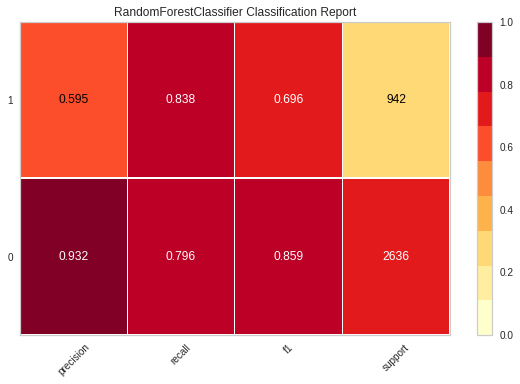

In [21]:
plot_model(rf_tuned, 'class_report')

### Feature importance

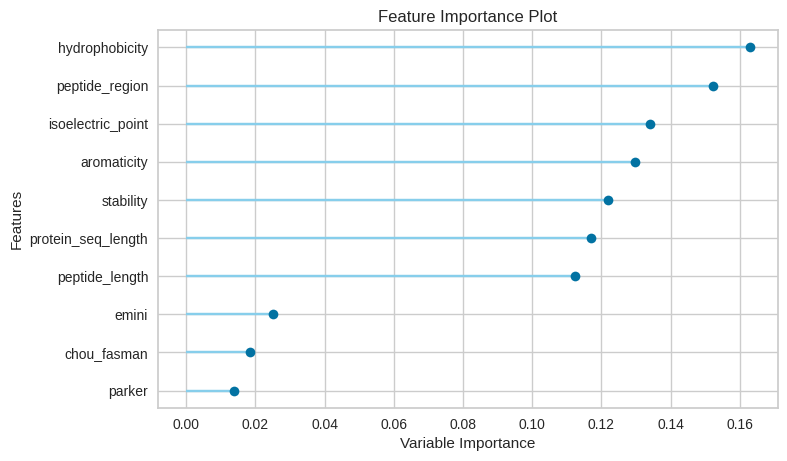

In [22]:
plot_model(rf_tuned, 'feature')

## Save the model

In [33]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

model_save_name = 'covid_predictor'
path = F"/content/gdrive/My Drive/Colab Notebooks/COVID-19_Prediction/{model_save_name}"

save_model(rf_tuned, path)

Mounted at /content/gdrive
Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strat...
                  RandomForestClassifier(bootstrap=False, ccp_alpha=0.0,
                                         class_weight='balanced_subsample',
                                         criterion='gini', max_depth=10,
                                         max_feature

## Make predictions

### Get COVID-19 data

In [38]:
covid = pd.read_csv("https://raw.githubusercontent.com/likarajo/covid19_prediction/main/input_covid.csv.zip")
covid

,parent_protein_id,protein_seq,start_position,end_position,peptide_seq,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability
0,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1,5,MGILP,0.948,0.280,1.033,-2.720,6.03595,0.10929,-0.138642,31.377603
1,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,2,6,GILPS,1.114,0.379,1.070,-0.580,6.03595,0.10929,-0.138642,31.377603
2,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,3,7,ILPSP,1.106,0.592,1.108,-1.300,6.03595,0.10929,-0.138642,31.377603
3,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,4,8,LPSPG,1.324,0.836,1.053,1.440,6.03595,0.10929,-0.138642,31.377603
4,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,5,9,PSPGM,1.326,1.004,0.968,2.440,6.03595,0.10929,-0.138642,31.377603
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20307,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1258,1277,YVRKDGEWVLLSTFLGHHHH,0.947,0.406,1.063,0.155,6.03595,0.10929,-0.138642,31.377603
20308,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1259,1278,VRKDGEWVLLSTFLGHHHHH,0.937,0.353,1.061,0.355,6.03595,0.10929,-0.138642,31.377603
20309,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1260,1279,RKDGEWVLLSTFLGHHHHHH,0.960,0.647,1.047,0.645,6.03595,0.10929,-0.138642,31.377603
20310,6VYB_A,MGILPSPGMPALLSLVSLLSVLLMGCVAETGTQCVNLTTRTQLPPA...,1261,1280,KDGEWVLLSTFLGHHHHHHH,0.960,0.449,1.058,0.540,6.03595,0.10929,-0.138642,31.377603


### Preprocess the data (similar to training data)

In [42]:
covid['protein_seq_length'] = covid.apply(lambda x: len(x.protein_seq), axis=1)
covid['peptide_length'] = covid.apply(lambda x: len(x.peptide_seq), axis=1)
covid['peptide_region'] = covid.apply(lambda x: x.peptide_length/x.protein_seq_length, axis=1)

covid = covid.drop(columns=['parent_protein_id','protein_seq','peptide_seq','start_position','end_position'])

covid

,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,protein_seq_length,peptide_length,peptide_region
0,0.948,0.280,1.033,-2.720,6.03595,0.10929,-0.138642,31.377603,1281,5,0.003903
1,1.114,0.379,1.070,-0.580,6.03595,0.10929,-0.138642,31.377603,1281,5,0.003903
2,1.106,0.592,1.108,-1.300,6.03595,0.10929,-0.138642,31.377603,1281,5,0.003903
3,1.324,0.836,1.053,1.440,6.03595,0.10929,-0.138642,31.377603,1281,5,0.003903
4,1.326,1.004,0.968,2.440,6.03595,0.10929,-0.138642,31.377603,1281,5,0.003903
...,...,...,...,...,...,...,...,...,...,...,...
20307,0.947,0.406,1.063,0.155,6.03595,0.10929,-0.138642,31.377603,1281,20,0.015613
20308,0.937,0.353,1.061,0.355,6.03595,0.10929,-0.138642,31.377603,1281,20,0.015613
20309,0.960,0.647,1.047,0.645,6.03595,0.10929,-0.138642,31.377603,1281,20,0.015613
20310,0.960,0.449,1.058,0.540,6.03595,0.10929,-0.138642,31.377603,1281,20,0.015613


### Load the model

In [40]:
drive.mount('/content/gdrive', force_remount=True)

model_save_name = 'covid_predictor'
path = F"/content/gdrive/My Drive/Colab Notebooks/COVID-19_Prediction/{model_save_name}"

model = load_model(path)

Mounted at /content/gdrive
Transformation Pipeline and Model Successfully Loaded


### Predict using the model

In [43]:
pred_covid = predict_model(model, covid)

pred_covid

,chou_fasman,emini,kolaskar_tongaonkar,parker,isoelectric_point,aromaticity,hydrophobicity,stability,protein_seq_length,peptide_length,peptide_region,Label,Score
0,0.948,0.280,1.033,-2.720,6.03595,0.10929,-0.138642,31.377603,1281,5,0.003903,1,0.8170
1,1.114,0.379,1.070,-0.580,6.03595,0.10929,-0.138642,31.377603,1281,5,0.003903,1,0.8198
2,1.106,0.592,1.108,-1.300,6.03595,0.10929,-0.138642,31.377603,1281,5,0.003903,1,0.8176
3,1.324,0.836,1.053,1.440,6.03595,0.10929,-0.138642,31.377603,1281,5,0.003903,1,0.8072
4,1.326,1.004,0.968,2.440,6.03595,0.10929,-0.138642,31.377603,1281,5,0.003903,1,0.7750
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20307,0.947,0.406,1.063,0.155,6.03595,0.10929,-0.138642,31.377603,1281,20,0.015613,1,0.6835
20308,0.937,0.353,1.061,0.355,6.03595,0.10929,-0.138642,31.377603,1281,20,0.015613,1,0.6835
20309,0.960,0.647,1.047,0.645,6.03595,0.10929,-0.138642,31.377603,1281,20,0.015613,1,0.6927
20310,0.960,0.449,1.058,0.540,6.03595,0.10929,-0.138642,31.377603,1281,20,0.015613,1,0.6835
